In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'~/Downloads/free.csv')
df.head()

,eval_month,account_email_domain,evaluation_source_detailed,distinct_tenants
0,2024-11-01,gmail.com,Upgrade - From Free,5368
1,2024-11-01,hotmail.com,Upgrade - From Free,102
2,2024-11-01,outlook.com,Upgrade - From Free,101
3,2024-11-01,icloud.com,Upgrade - From Free,30
4,2024-11-01,yahoo.com,Upgrade - From Free,24


In [9]:
df['email'] = df['account_email_domain'].str.extract(r'([a-zA-Z0-9.-]+)\.com')

In [10]:
df.head()

,eval_month,account_email_domain,evaluation_source_detailed,distinct_tenants,email
0,2024-11-01,gmail.com,Upgrade - From Free,5368,gmail
1,2024-11-01,hotmail.com,Upgrade - From Free,102,hotmail
2,2024-11-01,outlook.com,Upgrade - From Free,101,outlook
3,2024-11-01,icloud.com,Upgrade - From Free,30,icloud
4,2024-11-01,yahoo.com,Upgrade - From Free,24,yahoo


In [40]:
df[df['eval_month']=='2024-12-01'].groupby(['email', 'eval_month'])\
    .sum(['distinct_tenants'])\
        .reset_index()\
            .sort_values(by='distinct_tenants', ascending=False)

,email,eval_month,distinct_tenants
180,gmail,2024-12-01,1879
321,outlook,2024-12-01,36
202,hotmail,2024-12-01,19
481,yahoo,2024-12-01,17
355,qq,2024-12-01,7
...,...,...,...
159,ferroustool,2024-12-01,1
158,fasttrack-solutions,2024-12-01,1
157,faber-italy,2024-12-01,1
156,ext.ingroupe,2024-12-01,1


In [41]:
import numpy as np
df['email_type'] = np.where(df['email'].str.contains(r'gmail|outlook|hotmail|icloud|yahoo|google', na=False), 'generic', 'specific')

In [42]:
df.groupby(['email_type', 'eval_month'])\
    .sum(['distinct_tenants'])

distinct_tenants
email_type eval_month                  
generic    2024-11-01              5635
           2024-12-01              1959
specific   2024-11-01              2285
           2024-12-01               946

In [43]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='email_type,eval_month'>

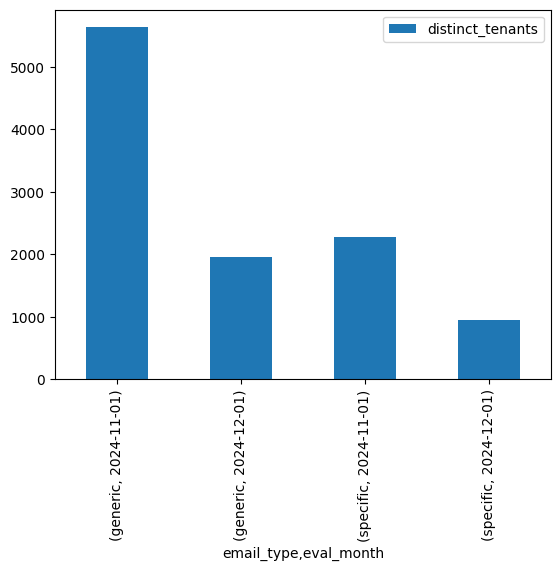

In [44]:
df.groupby(['email_type', 'eval_month'])\
    .sum(['distinct_tenants']).plot(kind='bar')

In [2]:
def test_scope():
    print = 1
    return print

print('Hello World')
print(test_scope())

Hello World
1


In [6]:
def calculate_circle_diameter(radius: int):
    """
    Calculates the Diameter of a Circle.

    Args:
        radius: Radius of a Circle (int).

    Returns:
        Diameter of a Circle (int).

    Raises:
        ValueError: If any of the inputs are negative.
        TypeError: If the input is not an integer.

    Example:
        >>> calculate_cirlce_diameter(7)
        14.0
    """
    try:
        if radius < 0:
            raise ValueError('Radius must be a positive integer.')
        return 2 * radius
    except TypeError:
        raise TypeError('Radius must be an integer.')

calculate_circle_diameter(7)

14

In [7]:
calculate_circle_diameter(-7)

ValueError: Radius must be a positive integer.

In [8]:
calculate_circle_diameter('7')

TypeError: Radius must be an integer.

# Custom Classes

## Function Decomposing

In [14]:
# Add your code here
def celsius_to_fahrenheit(celsius):
    '''Takes a temperature in Celsius and converts it to Fahrenheit.'''
    converted_f = (celsius - 32) * 5/9
    return f"{celsius}°C is equal to {converted_f}°F"
    # return f"{converted_f}°F"

def fahrenheit_to_celsius(fahrenheit):
    '''Takes a temperature in Fahrenheit and converts it to Celsius.'''
    converted_c = (fahrenheit * 9/5) + 32
    return f"{fahrenheit}°F is equal to {converted_c}°C"
    # return f"{converted_c}°C"

def convert_temperature(temperature, unit):
    '''Converts a temperature to the desired unit.'''
    if unit == 'F':
        return celsius_to_fahrenheit(temperature)
    elif unit == 'C':
        return fahrenheit_to_celsius(temperature)
    else:
        raise ValueError('Unit must be "F" or "C".')

print(convert_temperature(25, 'C'))
print(convert_temperature(77, 'F'))

25°F is equal to 77.0°C
77°C is equal to 25.0°F


In [17]:
def test_func(num, lst = []):
    lst.append(num)
    return lst

In [18]:
test_func(5)

[5]

In [19]:
test_func(10)

[5, 10]

In [20]:
test_func(14)

[5, 10, 14]

In [21]:
def test_func(num, lst = None):
    if lst is None:
        lst = []
    lst.append(num)
    return lst

In [22]:
test_func(5)

[5]

In [23]:
test_func(10)

[10]

In [24]:
def create_user_profile(name, age, occupation="Student", interests=None): # Use None as default
    """
    Creates a user profile with optional interests.

    Args:
        name (str): The user's name (required).
        age (int): The user's age (required).
        occupation (str, optional): The user's occupation (defaults to "Student").
        interests (list, optional): A list of the user's interests (defaults to None).
    """
    # if interests is None:  # Initialize if None
    #     interests = [] 

    profile = {
        "name": name,
        "age": age,
        "occupation": occupation,
        "interests": [] if interests is None else interests
    }

    return profile

# Usage
user1 = create_user_profile("Alice", 25, "Software Engineer", ["Coding", "Hiking"])
user2 = create_user_profile("Bob", 18)  # Uses default occupation and no interests
user3 = create_user_profile("Carol", 30, interests=["Gardening", "Reading"])

print(user1)
print(user2)
print(user3)

{'name': 'Alice', 'age': 25, 'occupation': 'Software Engineer', 'interests': ['Coding', 'Hiking']}
{'name': 'Bob', 'age': 18, 'occupation': 'Student', 'interests': []}
{'name': 'Carol', 'age': 30, 'occupation': 'Student', 'interests': ['Gardening', 'Reading']}


In [34]:
def make_sandwich(bread_type, filling, cheese=None, toasted=None):
    """
    Makes a sandwich with the given bread type, filling, cheese, and toasted status.

    Args:
        bread_type (str): The type of bread to use.
        filling (str): The filling to use.
        cheese (str, optional): The type of cheese to add (defaults to None).
        toasted (bool, optional): Whether to toast the sandwich (defaults to None).
    """
    toasted = '' if toasted is None else 'toasted '
    cheese = '' if cheese is None else ' and '+cheese+' cheese'

    sandwich = f"Making a {toasted}{bread_type} sandwich with {filling}{cheese}."
    return sandwich

make_sandwich("wheat", "turkey", "cheddar", True)


'Making a toasted wheat sandwich with turkey and cheddar cheese.'

In [35]:
make_sandwich("rye", "ham")

'Making a rye sandwich with ham.'

In [1]:
import string_utils

In [2]:
sentence = "This is a test sentence to count vowels."
vowel_count = string_utils.count_vowels(sentence)
print("Number of vowels:", vowel_count) 

Number of vowels: 12


In [12]:
# Add the SKU data provided to the product catalog dictionary
product_catalog = {
    'SKU123':{
        'name': 'Widget A',
        'price': 19.99,
        'quantity': 50
    },

    'SKU456':{
        'name': 'Gadget B',
        'price': 34.95,
        'quantity': 25
    },

    'SKU789':{
        'name': 'Gizmo C',
        'price': 9.99,
        'quantity': 100
    }
} 

def get_product_price(sku):
    item = product_catalog.get(sku)
    return f'The price of {item["name"]} is ${item["price"]}'

In [13]:
get_product_price('SKU789')

'The price of Gizmo C is $9.99'

In [9]:
product_catalog.get('SKU789')

{'name': 'Gizmo C', 'price': 9.99, 'quantity': 100}

In [18]:
from itertools import batched

numbers: list[int] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_batch: batched = batched(numbers, n=3)

print(my_batch)

In [19]:
print(next(my_batch))

(1, 2, 3)


In [20]:
from itertools import zip_longest

list1: list[int] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list2: list[str] = ['a', 'b', 'c']

In [25]:
zipped: zip_longest = zip_longest(list1, list2, fillvalue='-') # not having fillvalue will return None for missing values

In [26]:
list(zipped)

[(1, 'a'),
 (2, 'b'),
 (3, 'c'),
 (4, '-'),
 (5, '-'),
 (6, '-'),
 (7, '-'),
 (8, '-'),
 (9, '-'),
 (10, '-')]

In [27]:
from itertools import product

list1: list[int] = [1, 2, 3]

[*product(list1, repeat=3)]

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [28]:
from itertools import starmap

def get_sum(a:int, b:int, c:int):
    return sum((a, b, c))

data: list[tuple[int, int,int]] = [(1,2,3), [4, 5, 6]]
sums: starmap = starmap(get_sum, data)

In [29]:
[*sums]

[6, 15]

In [30]:
data: list[tuple[int, int]] = [(2,4), (3, 3), (4,2)]
sums: starmap = starmap(pow, data)

In [31]:
[*sums]

[16, 27, 16]

In [32]:
from itertools import groupby

def count_vowels(word: str) -> int:
    vowel_count: int = 0

    for letter in word:
        if letter in 'aeiouAEIOU':
            vowel_count += 1
    return vowel_count

In [33]:
words: list[str] = ['cat', 'dog', 'mood', 'banana', 'red', 'hood', 'mate']
sorted_words: list[str] = sorted(words, key=count_vowels)
sorted_words

['cat', 'dog', 'red', 'mood', 'hood', 'mate', 'banana']

In [36]:
for vowels, words in groupby(sorted_words, key=count_vowels):
    print(f'{vowels=} ==> {[*words]}')

vowels=1 ==> ['cat', 'dog', 'red']
vowels=2 ==> ['mood', 'hood', 'mate']
vowels=3 ==> ['banana']
